In [76]:
import mlflow

In [77]:
# set the path to the mlruns directory one level above the current directory
mlflow.set_tracking_uri("file:../mlruns")

In [78]:
all_runs = mlflow.search_runs(search_all_experiments=True)

In [79]:
all_runs.head()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.accuracy,metrics.recall,metrics.support,metrics.f1,metrics.precision,metrics.macro_f1_score,params.lr,params.epochs,params.model_name,tags.mlflow.source.git.commit,tags.mlflow.source.name,tags.mlflow.source.type,tags.mlflow.user,tags.mlflow.runName
0,8d052d57c8e84adf9253e6f45c7df727,507776702722051758,FINISHED,file:///home/pops/myProjects/ts_classification...,2024-03-16 14:07:30.655000+00:00,2024-03-16 14:07:30.666000+00:00,0.040000,0.038462,850.0,0.003077,0.001538,0.002959,0.001,500,LSTM,07bbea209f8b64f16d80d0b1ec95731e83acab93,main.py,LOCAL,pops,Handwriting
1,bc69c73360a748f5b3a5260479d6f61f,507776702722051758,FINISHED,file:///home/pops/myProjects/ts_classification...,2024-03-16 14:07:26.255000+00:00,2024-03-16 14:07:26.267000+00:00,0.040000,0.038462,850.0,0.003077,0.001538,0.002959,0.001,500,LSTM,07bbea209f8b64f16d80d0b1ec95731e83acab93,main.py,LOCAL,pops,Handwriting
2,3764243969964025ba8e5b7daa6f9ded,507776702722051758,FINISHED,file:///home/pops/myProjects/ts_classification...,2024-03-16 14:07:22.044000+00:00,2024-03-16 14:07:22.056000+00:00,0.040000,0.038462,850.0,0.003077,0.001538,0.002959,0.001,500,LSTM,07bbea209f8b64f16d80d0b1ec95731e83acab93,main.py,LOCAL,pops,Handwriting
3,2f542b211a6e4616ad18d2c4b8ab614c,507776702722051758,FINISHED,file:///home/pops/myProjects/ts_classification...,2024-03-16 14:07:17.822000+00:00,2024-03-16 14:07:17.834000+00:00,0.052941,0.040961,850.0,0.008116,0.004685,0.006798,0.001,500,LSTM,07bbea209f8b64f16d80d0b1ec95731e83acab93,main.py,LOCAL,pops,Handwriting
4,6259b6a31bd74108bea367fe924cd0b9,507776702722051758,FINISHED,file:///home/pops/myProjects/ts_classification...,2024-03-16 14:07:13.620000+00:00,2024-03-16 14:07:13.632000+00:00,0.042353,0.041052,850.0,0.006768,0.005542,0.006847,0.001,500,LSTM,07bbea209f8b64f16d80d0b1ec95731e83acab93,main.py,LOCAL,pops,Handwriting


In [80]:
# # group by runName and modelName
# grouped = all_runs['tags.mlflow.runName', 'params.model_name']

In [81]:
all_runs['tags.mlflow.runName'].unique()

array(['Handwriting', 'ECG200', 'ItalyPowerDemand',
       'HandMovementDirection'], dtype=object)

In [82]:
# for all individual runs, find the best 'params.model_name' and 'metrics.accuracy'
best_runs = all_runs.groupby('tags.mlflow.runName').apply(lambda x: x.loc[x['metrics.accuracy'].idxmax()])
best_runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.accuracy,metrics.recall,metrics.support,metrics.f1,metrics.precision,metrics.macro_f1_score,params.lr,params.epochs,params.model_name,tags.mlflow.source.git.commit,tags.mlflow.source.name,tags.mlflow.source.type,tags.mlflow.user,tags.mlflow.runName
tags.mlflow.runName,,,,,,,,,,,,,,,,,,,,
ECG200,0e15939a6611425893098c7270496c0c,630520445005025449,FINISHED,file:///home/pops/myProjects/ts_classification...,2023-07-15 09:20:32.003000+00:00,2023-07-15 09:20:32.015000+00:00,0.920000,0.901042,100.0,0.918859,0.924632,0.910873,0.001,500,LSTM_FCN,13cf9d677184927fcb4663b315ffb63cbab29ee3,main.py,LOCAL,pops,ECG200
HandMovementDirection,24ffa869557c4455b1aa6c10a16c6deb,630520445005025449,FINISHED,file:///home/pops/myProjects/ts_classification...,2023-07-15 06:30:37.425000+00:00,2023-07-15 06:30:37.436000+00:00,0.486486,0.459524,74.0,0.459872,0.444535,0.422585,0.001,5,LSTM_FCN,849a18b4b1e721bdefe8b94200ebc01052a1b2fe,main.py,LOCAL,pops,HandMovementDirection
Handwriting,effd1944d2f6451e8535f2db4dee468a,813185422761216114,FINISHED,file:///home/pops/myProjects/ts_classification...,2024-03-16 13:49:29.846000+00:00,2024-03-16 13:49:29.862000+00:00,0.101176,0.096150,850.0,0.055720,0.095289,0.052794,0.001,500,GRU_FCN,04493d4bfa7a8148495d5adec7088029dcde13a6,main.py,LOCAL,pops,Handwriting
ItalyPowerDemand,826eade71c5e473698c1dcd4eac4c4f7,630520445005025449,FINISHED,file:///home/pops/myProjects/ts_classification...,2023-07-15 08:40:53.472000+00:00,2023-07-15 08:40:53.489000+00:00,0.910593,0.910779,1029.0,0.910240,0.917334,0.910256,0.001,5,LSTM_FCN,ccbee5df8ad91eaebb24e14857c89b0759064337,main.py,LOCAL,pops,ItalyPowerDemand


In [83]:
# for all individual runs, find the best 'metrics.accuracy' for each 'params.model_name'
# select only the relevant columns
best_runs = all_runs.groupby('params.model_name').apply(lambda x: x.loc[x['metrics.accuracy'].idxmax()][['tags.mlflow.runName', 'params.model_name', 'metrics.accuracy']])
best_runs

,tags.mlflow.runName,params.model_name,metrics.accuracy
params.model_name,,,
GRU_FCN,ECG200,GRU_FCN,0.910000
LSTM,ItalyPowerDemand,LSTM,0.559767
LSTM_FCN,ECG200,LSTM_FCN,0.920000


In [84]:
columns = ['tags.mlflow.runName', 'params.model_name', 'metrics.accuracy']
all_runs = all_runs[columns]
all_runs.head()

,tags.mlflow.runName,params.model_name,metrics.accuracy
0,Handwriting,LSTM,0.040000
1,Handwriting,LSTM,0.040000
2,Handwriting,LSTM,0.040000
3,Handwriting,LSTM,0.052941
4,Handwriting,LSTM,0.042353


In [85]:
# select only the best run for each model and dataset
best_runs = all_runs.groupby(['tags.mlflow.runName', 'params.model_name']).agg({'metrics.accuracy': 'max'}).reset_index()
best_runs.head()

,tags.mlflow.runName,params.model_name,metrics.accuracy
0,ECG200,GRU_FCN,0.910000
1,ECG200,LSTM_FCN,0.920000
2,HandMovementDirection,LSTM_FCN,0.486486
3,Handwriting,GRU_FCN,0.101176
4,Handwriting,LSTM,0.054118


In [86]:
# pivot the table to get the desired format
best_runs.pivot(index='tags.mlflow.runName', columns='params.model_name', values='metrics.accuracy')

# Remove multi-index and rename the index column to 'Dataset'
best_runs = best_runs.pivot(index='tags.mlflow.runName', columns='params.model_name', values='metrics.accuracy').reset_index()
best_runs.columns.name = None
best_runs = best_runs.rename(columns={'tags.mlflow.runName': 'Dataset'})
best_runs

,Dataset,GRU_FCN,LSTM,LSTM_FCN
0,ECG200,0.910000,NaN,0.920000
1,HandMovementDirection,NaN,NaN,0.486486
2,Handwriting,0.101176,0.054118,0.075294
3,ItalyPowerDemand,NaN,0.559767,0.910593


In [40]:
# combine everything into a single cell
def get_best_runs():
    import mlflow
    import pandas as pd
    
    mlflow.set_tracking_uri("file:../mlruns")
    all_runs = mlflow.search_runs(search_all_experiments=True)
    columns = ['tags.mlflow.runName', 'params.model_name', 'metrics.accuracy']
    all_runs = all_runs[columns]
    best_runs = all_runs.groupby(['tags.mlflow.runName', 'params.model_name']).agg({'metrics.accuracy': 'max'}).reset_index()
    best_runs = best_runs.pivot(index='tags.mlflow.runName', columns='params.model_name', values='metrics.accuracy').reset_index()
    best_runs.columns.name = None
    best_runs = best_runs.rename(columns={'tags.mlflow.runName': 'Dataset'})
    # export to the "../results/best_runs.csv" file
    best_runs.to_csv('../results/best_runs.csv', index=False)
    # convert the dataframe to an HTML table
    best_runs_html = best_runs.to_html(index=False)
    return best_runs_html
    return best_runs

In [42]:
html = get_best_runs()

In [43]:
# view the HTML table
from IPython.display import HTML
HTML(html)

Dataset,GRU_FCN,LSTM,LSTM_FCN
ECG200,0.910000,NaN,0.920000
HandMovementDirection,NaN,NaN,0.486486
Handwriting,0.082353,NaN,0.075294
ItalyPowerDemand,NaN,0.559767,0.910593


In [44]:
# export the html to a file
with open('../results/best_runs.html', 'w') as f:
    f.write(html)

In [45]:
# save as markdown file
with open('../results/best_runs.md', 'w') as f:
    f.write(best_runs.to_markdown(index=False))
    

In [52]:
# expport as an image
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

(0.0, 1.0, 0.0, 1.0)

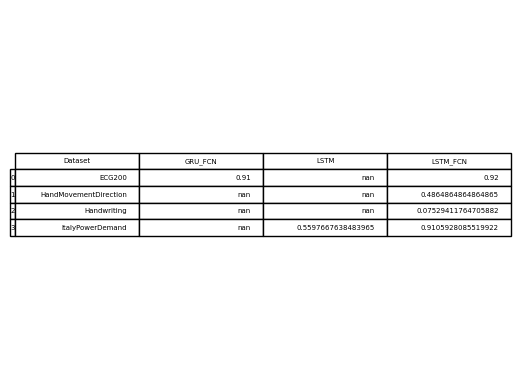

In [53]:
# plot as table
pd.plotting.table(data=best_runs, ax=plt.gca(), loc='center')
plt.axis('off')


In [1]:
import torch

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu
